In [20]:
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"/Users/iqrabismi/Desktop/creditcard.csv")

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Using Profiler for Data Exploration

In [5]:
profile = ProfileReport(df)
profile.to_file("creditcard_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

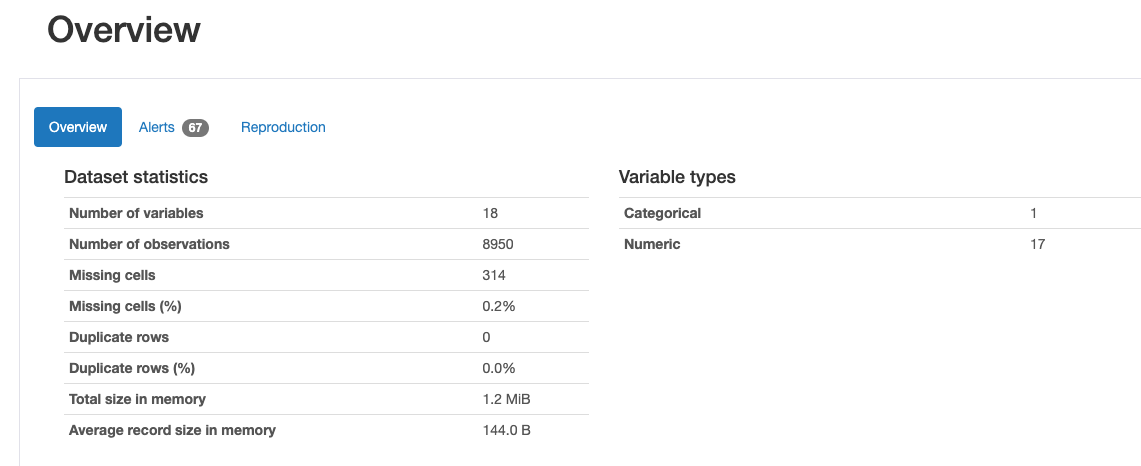

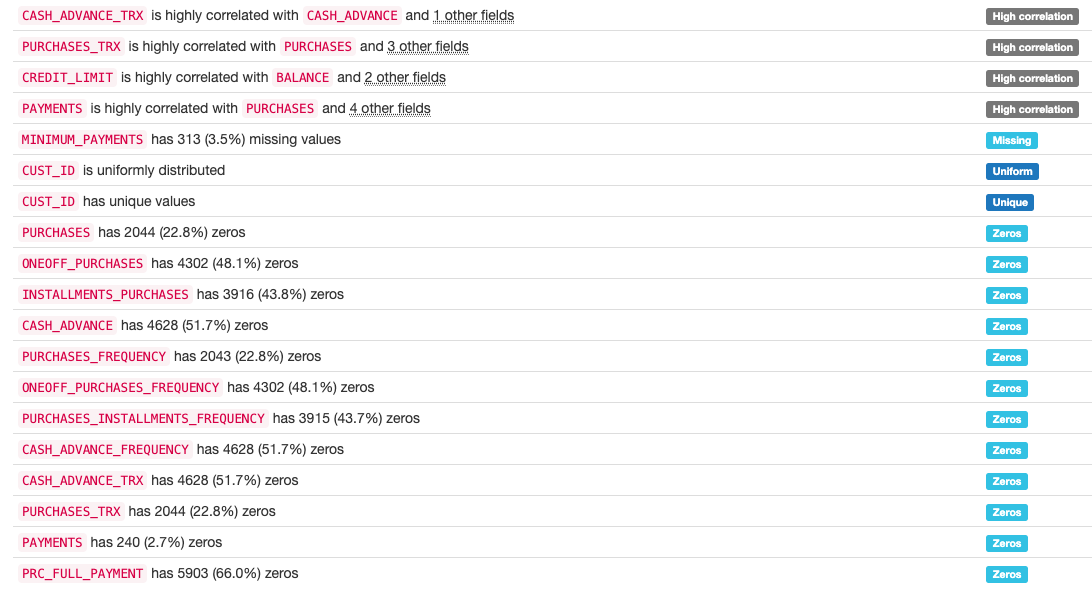

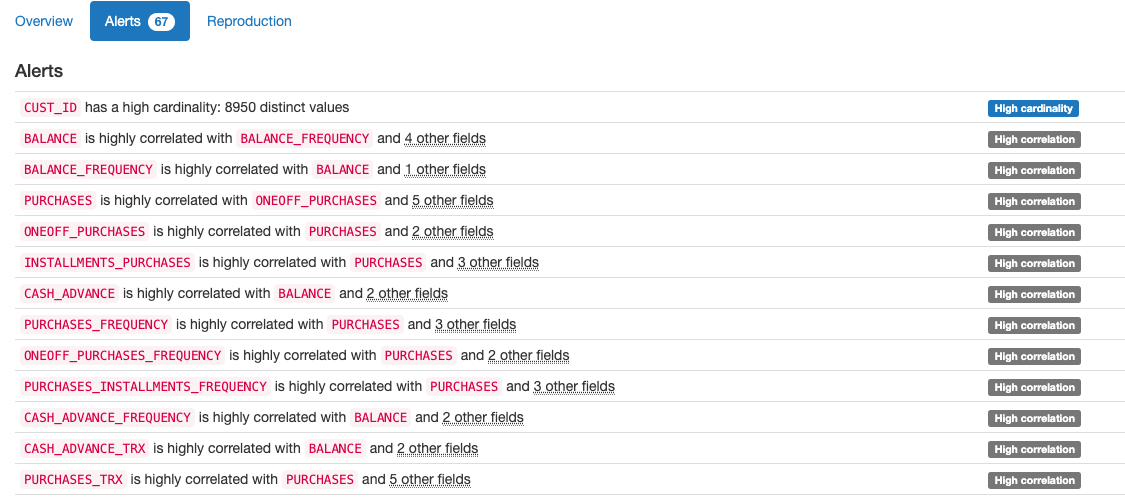

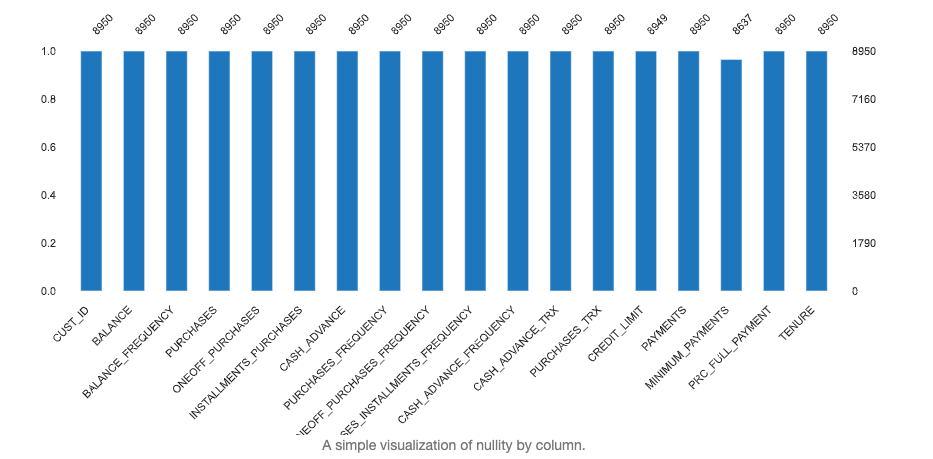

### Data Exploration

##### From the graph above there is high cardinality for Cust_Id and including this column is not required in our analysis. Hence, removing this column 

In [7]:
 df.pop('CUST_ID')

0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C19186
8946    C19187
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 8950, dtype: object

In [8]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
len(df)

8950

In [10]:
df.shape

(8950, 17)

In [11]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

##### From the graph above there is missing values in credit limits and minimum payments. As the number of missing values  are too less. so Imputing them with Knn imputer from Sklearn.

In [6]:
from sklearn.impute import KNNImputer

In [12]:
imputer= KNNImputer(n_neighbors=4)

In [14]:
credit_limit= imputer.fit_transform(df.CREDIT_LIMIT.values.reshape(-1,1))

In [15]:
min_payments= imputer.fit_transform(df.MINIMUM_PAYMENTS.values.reshape(-1,1))

In [16]:
df['MINIMUM_PAYMENTS']= min_payments

In [17]:
df['CREDIT_LIMIT'] = credit_limit

In [18]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

<Figure size 576x720 with 0 Axes>

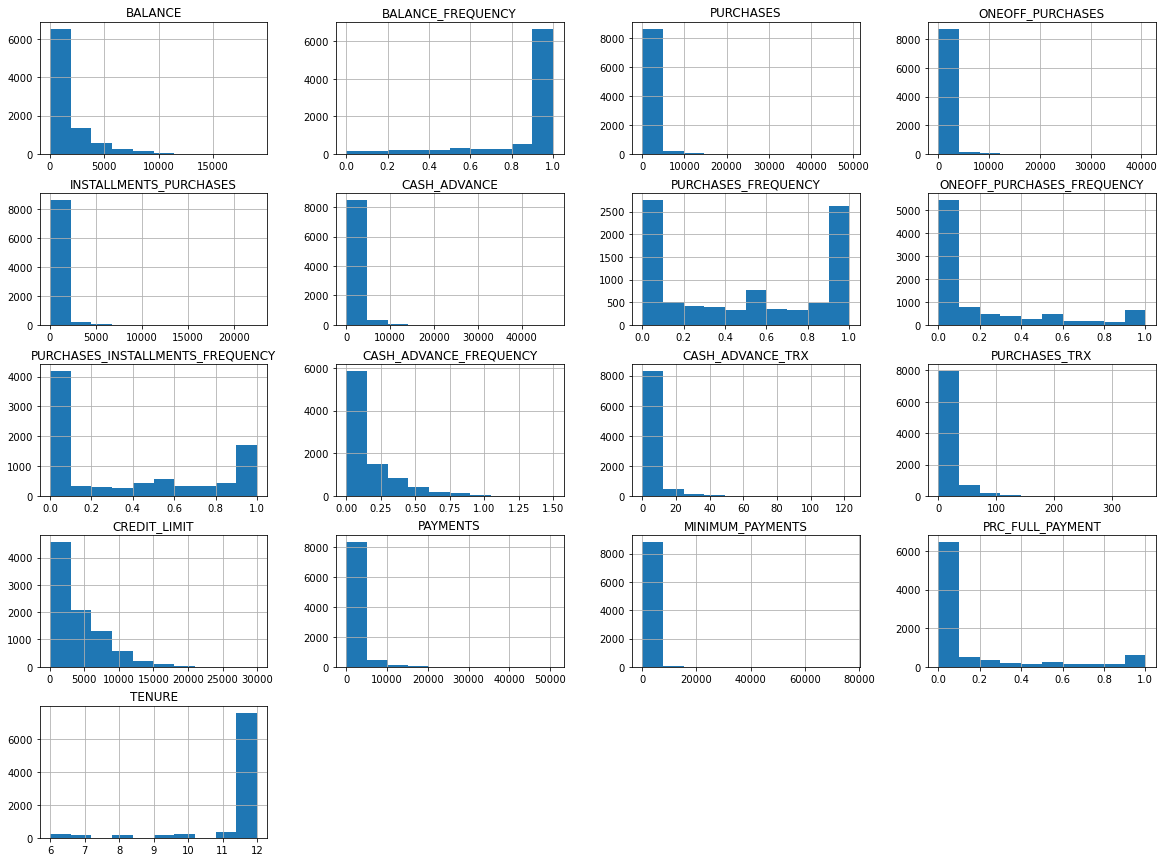

In [28]:
plt.figure(figsize=(8,10))
df.hist(figsize=(20,15))

##### Data is not normally distributed. Hence, we shall do data transformation by implementing log transformation. As log is a monotonically increasing function hence it become normal distributed. 

##### As per the profiler report there are no duplicate values

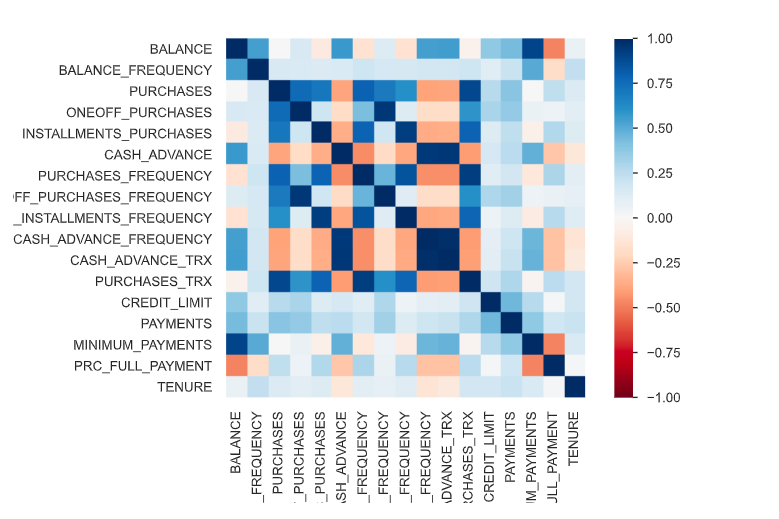

#### As we can see from the heatmap above, that many features are correlated with each other. Hence, we shall implement PCA to convert highly correlated variable into linear uncorrelated variables

### Data Preprocessing

In [22]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Data Normalisation using MinMaxScaler

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
transformer = MinMaxScaler().fit(df)

In [82]:
df_transformed= transformer.transform(df)

In [83]:
df_trans= pd.DataFrame(df_transformed)

In [84]:
col= df.columns

In [85]:
df_trans.columns= col

In [86]:
df_trans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


In [87]:
df_trans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.082154,0.109306,0.0,0.006736,0.045864,0.107868,1.0
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.0
PURCHASES,8950.0,0.020457,0.043570,0.0,0.000808,0.007367,0.022637,1.0
ONEOFF_PURCHASES,8950.0,0.014534,0.040722,0.0,0.000000,0.000932,0.014166,1.0
INSTALLMENTS_PURCHASES,8950.0,0.018270,0.040193,0.0,0.000000,0.003956,0.020828,1.0
CASH_ADVANCE,8950.0,0.020766,0.044491,0.0,0.000000,0.000000,0.023629,1.0
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.083333,0.300000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8950.0,0.090096,0.133414,0.0,0.000000,0.000000,0.148148,1.0


##### Log Transformation

In [88]:
df_trans= df_trans.applymap(lambda x: np.log(x+1))
#for handling negative values is to add a constant value to the data prior to applying the log transform. 
#The transformation is therefore log(Y+a) where a is the constant.

In [89]:
df_trans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002145,0.597837,0.001943,0.000000,0.004231,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,0.005571,0.031227,0.003971,0.001824,0.000000,0.693147
1,0.155438,0.646627,0.000000,0.000000,0.000000,0.128116,0.000000,0.000000,0.000000,0.154151,0.032003,0.000000,0.208682,0.077788,0.013937,0.200671,0.693147
2,0.123125,0.693147,0.015643,0.018791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.032970,0.222141,0.012190,0.008176,0.000000,0.693147
3,0.083901,0.492477,0.030109,0.036115,0.000000,0.004356,0.080042,0.080042,0.000000,0.054067,0.008097,0.002789,0.222141,0.000000,0.011247,0.000000,0.693147
4,0.042044,0.693147,0.000326,0.000392,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.002789,0.037678,0.013285,0.003198,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001495,0.693147,0.005919,0.000000,0.012856,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,0.016621,0.031227,0.006399,0.000639,0.405465,0.000000
8946,0.001007,0.693147,0.006099,0.000000,0.013245,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,0.016621,0.031227,0.005424,0.011247,0.000000,0.000000
8947,0.001228,0.606136,0.002940,0.000000,0.006397,0.000000,0.606136,0.000000,0.510826,0.000000,0.000000,0.013870,0.031227,0.001601,0.001078,0.223144,0.000000
8948,0.000706,0.606136,0.000000,0.000000,0.000000,0.000775,0.000000,0.000000,0.000000,0.105361,0.016129,0.000000,0.014913,0.001036,0.000729,0.223144,0.000000


array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

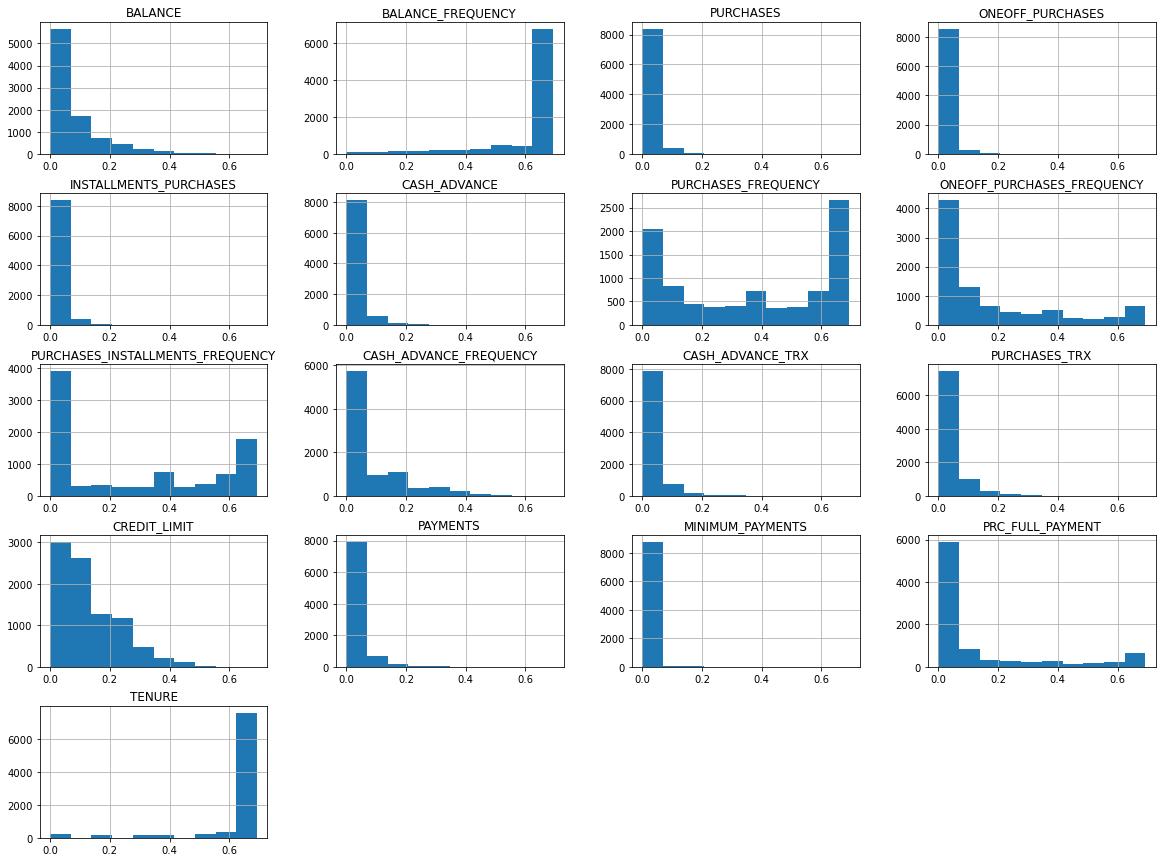

In [90]:
df_trans.hist(figsize=(20,15))

### Dimensionality Reduction using PCA

In [91]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA()

In [93]:
df_pca = pca.fit_transform(df_trans)

In [97]:
## table to see variation with reference to Principal Components

num= range(1,18)
df1_pca= pd.DataFrame(num, columns=['Number of components'])
var= pca.explained_variance_
df1_pca= df1_pca.assign(Variance=var)

In [99]:
per_var= (pca.explained_variance_ratio_)*100

In [100]:
df1_pca= df1_pca.assign(per_variance =per_var)

In [102]:
cum_var= (pca.explained_variance_ratio_.cumsum())*100

In [103]:
df1_pca = df1_pca.assign(cum_variance =cum_var)

In [104]:
df1_pca

,Number of components,Variance,per_variance,cum_variance
0,1,1.633441e-01,48.571072,48.571072
1,2,4.908615e-02,14.595981,63.167053
2,3,4.317070e-02,12.836998,76.004051
3,4,2.265132e-02,6.735469,82.739520
4,5,2.108972e-02,6.271122,89.010642
5,6,1.465047e-02,4.356381,93.367023
6,7,7.913268e-03,2.353045,95.720067
7,8,5.145601e-03,1.530067,97.250134
8,9,2.900143e-03,0.862370,98.112505
9,10,2.310430e-03,0.687017,98.799521


### Screeplot to see amount of vaiance explained by different components

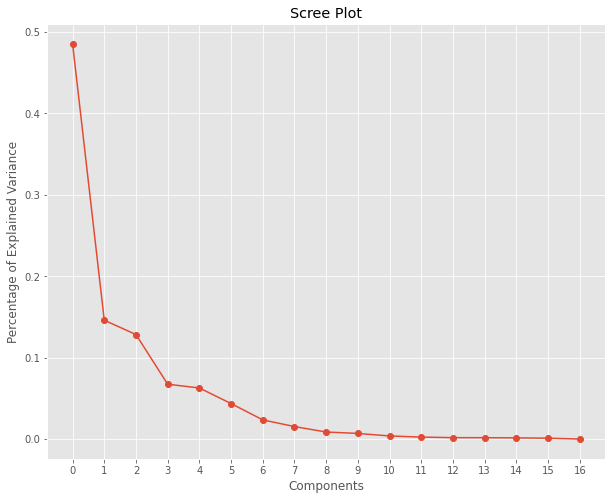

In [107]:
# Plot
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xticks(range(0, 17))
plt.xlabel('Components') 
plt.ylabel('Percentage of Explained Variance') 
plt.title('Scree Plot')
plt.show();

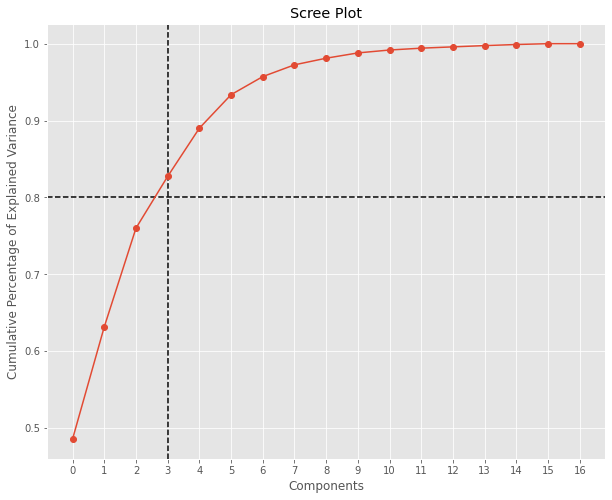

In [118]:
# Plot
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.axhline(y=0.8, color='black', linestyle='--')
plt.axvline(x=3, color='black', linestyle='--')
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xticks(range(0, 17))
plt.xlabel('Components') 
plt.ylabel('Cumulative Percentage of Explained Variance') 
plt.title('Scree Plot')
plt.show();

It is important to retain a significant portion of the variance in the data when using PCA, as the variance represents the amount of information and diversity present in the data. The greater the variance, the more information and diversity the data contains. The goal of using PCA to reduce dimensionality is to preserve as much of this information and diversity as possible.

Maintaining the variance of the original data helps to ensure that the reduced representation of the data still contains most of the information present in the original data. This is critical as reducing dimensionality often results in some loss of information. The more variance that is preserved, the less information is lost.

Moreover, preserving the variance of the data also ensures that the diversity of the data is retained, leading to results from PCA that are representative of the original data and easily interpretable.

In [113]:
pca1 = PCA(n_components=4, random_state=18)
df_pca1 = pca1.fit_transform(df_trans)
df_pca1.shape

(8950, 4)

## Hierarchial Clustering

In [170]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

Agglomerative hierarchical clustering is a clustering method that starts by treating each data point as its own cluster. The algorithm then combines the closest clusters repeatedly until all data points are grouped into a single cluster or until a specified number of clusters is reached. This is done by calculating the distance between the clusters and merging the pair with the shortest distance.

In [168]:
clustering = AgglomerativeClustering(linkage='ward').fit(df_pca1)

In [169]:
clustering.labels_

array([1, 1, 0, ..., 0, 1, 0])

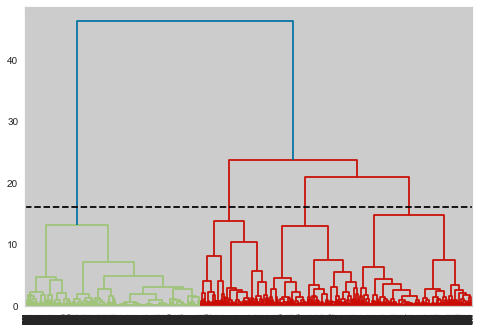

In [173]:
linked = linkage(df_pca1, method='ward')

# plot dendrogram
plt.axhline(y=16, color='black', linestyle='--')
dendrogram(linked)
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

The Elbow method is a commonly used technique to determine the optimal number of clusters for a given dataset in K-Means clustering. The elbow visualization helps to identify the "elbow" or the point at which adding more clusters doesn't result in a significant reduction in the within-cluster sum of squared errors (WCSS). The WCSS is a measure of the distance between the points within a cluster, so a lower WCSS indicates a tighter and more compact cluster.

The KElbowVisualizer class in the yellowbrick library can be used to plot the WCSS against the number of clusters and the "elbow" can be visually identified. The optimal number of clusters is usually considered to be the value where the WCSS begins to level off, indicating that adding more clusters would not result in a significant improvement in the clustering solution. The KElbowVisualizer also allows you to tune the number of clusters by changing the value of the 'k' parameter in the KMeans() class.

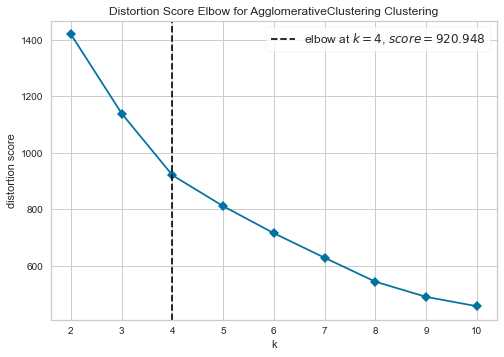

In [174]:
visualizer = KElbowVisualizer(AgglomerativeClustering(), timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

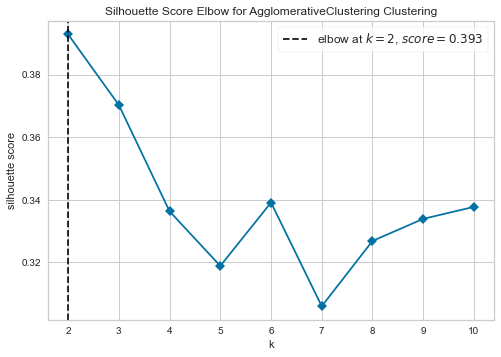

In [175]:
visualizer = KElbowVisualizer(AgglomerativeClustering(), metric='silhouette', timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

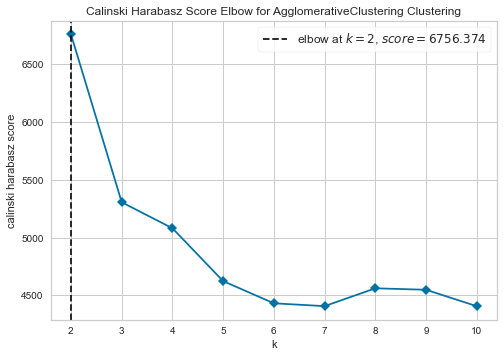

In [176]:
visualizer = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Calinski-Harabasz Index is an internal evaluation metric used to determine the optimal number of clusters in a k-means clustering algorithm. It measures the ratio of the sum of between-cluster variance and the sum of within-cluster variance. The higher the Calinski-Harabasz score, the better the model is. It is used as a way to determine the optimal number of clusters because when the number of clusters increases, the between-cluster variance will increase, while the within-cluster variance will decrease. The Calinski-Harabasz score reaches its maximum value when the number of clusters is equal to the number of samples in the data set.

##### Hence, from the above graphs, 2 appears to be the ideal number for clusters

In [185]:
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
# ward is based on min variance. Apart from this, there are other linkage methods such as single linkage, average linkage, complete linkage. 

# Fit the model to the data
hc.fit(df_pca1)

# Prints the labels for each example
hc_labels = hc.labels_

In [186]:
df2= df.copy()

In [187]:
df2['labels'] = hc_labels

In [188]:
df2['labels'].value_counts()

0    5432
1    3518
Name: labels, dtype: int64

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

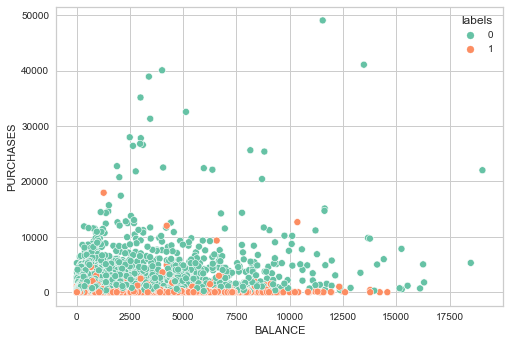

In [190]:
sns.scatterplot(data=df2, x='BALANCE', y='PURCHASES', hue='labels', palette = 'Set2')

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='PURCHASES'>

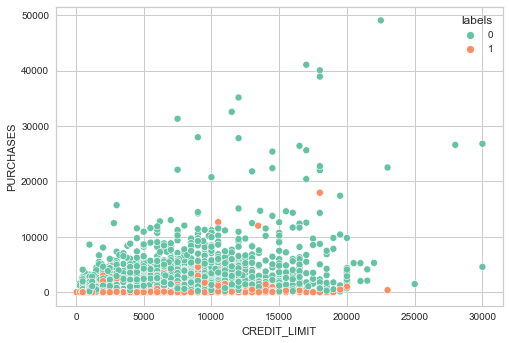

In [191]:
sns.scatterplot(data=df2, x='CREDIT_LIMIT', y='PURCHASES', hue='labels', palette = 'Set2')

In [196]:
df_pca2_db = pd.DataFrame(data = df_pca2[:,[0,1]], columns = ['pca1', 'pca2'])

In [198]:

# Append cluster labels to the Dataframe
df_pca2_db = pd.concat([df_pca2_db, pd.DataFrame({'cluster':hc_labels})], axis=1)
# Table with 2 PCAs
df_pca2_db.head()

,pca1,pca2,cluster
0,-0.323215,-0.093842,1
1,-0.448072,-0.030777,1
2,0.177024,0.629385,0
3,-0.411592,0.028166,1
4,-0.397302,0.023700,1


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

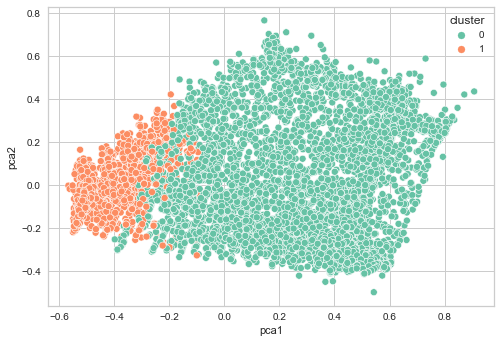

In [199]:
sns.scatterplot(data=df_pca2_db, x='pca1', y='pca2', hue='cluster', palette = 'Set2')

### DBSCAN: Density Based Clustering

In [200]:
from sklearn.cluster import DBSCAN

In [201]:
dbscan = DBSCAN(eps=0.01, min_samples=2).fit(df_pca1)

# Getting the cluster labels
labels = dbscan.labels_

In [203]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 604
Estimated number of noise points: 5166


In DBSCAN, the value of -1 is used to label outliers or data points that are not part of any cluster. DBSCAN clusters points that are close to each other and labels points that are far away from any cluster as outliers. The value of -1 is used to indicate that a data point is an outlier and does not belong to any cluster. This can help in identifying and removing noisy or irrelevant data points from the analysis.

In [209]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score

The Silhouette score, Calinski-Harabasz score, and Davies-Bouldin score are all evaluation metrics used to assess the performance of clustering algorithms. Here's a brief explanation of each:

Silhouette score: The Silhouette score measures the similarity of each data point to its own cluster compared to other clusters. It ranges from -1 to 1, with a higher score indicating that the data points are well-clustered and have a high similarity within their own cluster and low similarity with other clusters. This metric is used when we want to evaluate the quality of clustering when the number of clusters is already known.

Calinski-Harabasz score: The Calinski-Harabasz score is based on the ratio of the between-cluster variance to the within-cluster variance. It measures the separation between clusters, with a higher score indicating better separation and a better clustering result. This metric is commonly used when we want to determine the number of clusters in a dataset.

Davies-Bouldin score: The Davies-Bouldin score measures the similarity between each cluster and its most similar cluster. It ranges from 0 to infinity, with a lower score indicating a better clustering result. This metric is used when we want to evaluate the quality of clustering when the number of clusters is already known.

In general, when the number of clusters is already known, the Silhouette score and Davies-Bouldin score can be used to evaluate the quality of clustering. When the number of clusters is unknown, the Calinski-Harabasz score can be used to determine the number of clusters. However, it is always important to keep in mind the specific characteristics and requirements of your data and the problem you are trying to solve when choosing the appropriate evaluation metric.





In [210]:
# Evaluating metrics for several different cluster values

# Metrics

eps =[]
min_samples = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
n_clusters = []
metrics_dbscan = []

for eps in np.linspace(0.01,0.10, num=5):
    for min_sample in range(2, 60, 5):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(df_pca1)
        pred = dbscan.labels_

        silhouette = silhouette_score(df_pca1, pred)
        calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
        davies_bouldin = davies_bouldin_score(df_pca1, pred)
        metrics_dbscan.append((eps, min_sample, silhouette, calinski_harabasz, davies_bouldin, len(set(dbscan.labels_))) )
        
df_dbscan = pd.DataFrame(metrics_dbscan, columns=['Eps', 'Min Samples', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin', 'Number of Clusters'])
df_dbscan.sort_values('Silhouette', ascending=False).head(10)

,Eps,Min Samples,Silhouette,Calinski Harabasz,Davies Bouldin,Number of Clusters
46,0.0775,52,0.159948,1919.984846,1.366576,5
55,0.1000,37,0.106495,423.896068,1.849690,4
56,0.1000,42,0.104987,426.703451,1.854162,4
57,0.1000,47,0.103350,428.013422,1.853721,4
45,0.0775,47,0.080528,663.153635,2.069747,3
58,0.1000,52,0.078672,399.627153,1.630473,5
59,0.1000,57,0.077153,484.933186,1.804484,4
50,0.1000,12,0.060354,135.164651,1.777519,5
44,0.0775,42,0.056977,494.085919,1.758705,4
43,0.0775,37,0.055122,393.235224,1.573834,5


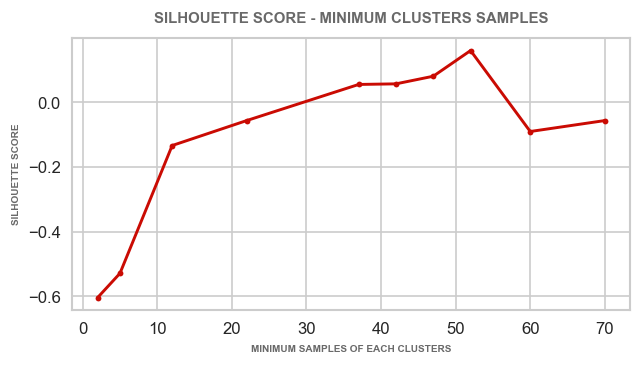

In [211]:


silhouette_coefs = []

for min_points in [2, 5, 12, 22, 37, 42, 47, 52, 60, 70]:
    db = DBSCAN(eps = 0.0775, min_samples = min_points)
    db.fit(df_pca1)
    silhouette_coefs.append(silhouette_score(df_pca1, db.labels_))
    
plt.figure(figsize = (6, 3), dpi = 120)
plt.plot([2, 5, 12, 22, 37, 42, 47, 52, 60, 70], silhouette_coefs, color = 'r', marker = '.')
plt.title('SILHOUETTE SCORE - MINIMUM CLUSTERS SAMPLES', fontsize = 9, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('MINIMUM SAMPLES OF EACH CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 6)
plt.ylabel('SILHOUETTE SCORE', color = 'dimgrey', fontweight = 'bold', fontsize = 6)
plt.show();

In [212]:
# DBSCAN instance
dbscan = DBSCAN(eps=0.0775, min_samples=52).fit(df_pca1)

# Getting the cluster labels
dbscan_labels = dbscan.labels_

In [213]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 3946


In [214]:
df2['dbscancluster'] = dbscan_labels

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

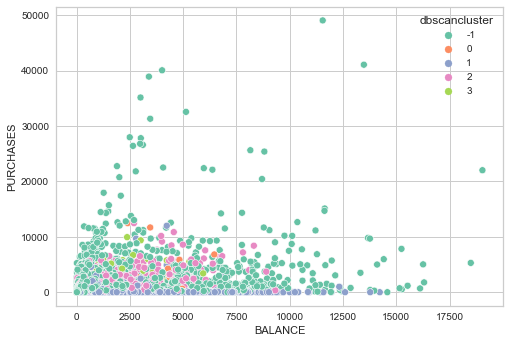

In [215]:
sns.scatterplot(data=df2, x='BALANCE', y='PURCHASES', hue='dbscancluster', palette = 'Set2')

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='PURCHASES'>

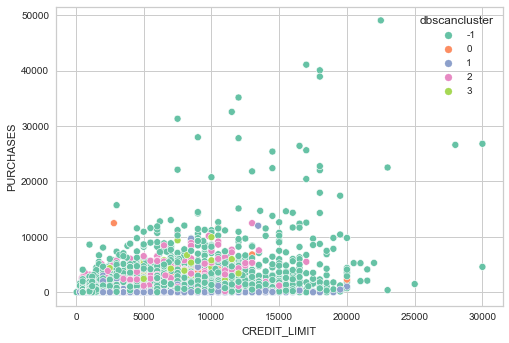

In [216]:
sns.scatterplot(data=df2, x='CREDIT_LIMIT', y='PURCHASES', hue='dbscancluster', palette = 'Set2')

In [217]:
df_pca2_db['dbscancluster'] = dbscan_labels

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

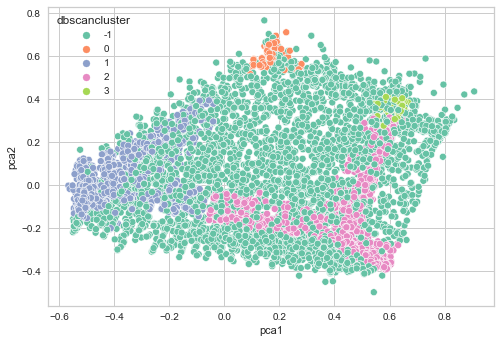

In [218]:
sns.scatterplot(data=df_pca2_db, x='pca1', y='pca2', hue='dbscancluster', palette = 'Set2')

In [219]:
# Final DBSCAN model

# Metrics
metrics = []

dbscan = DBSCAN(eps=0.0775, min_samples=52).fit(df_pca1)
pred = dbscan.labels_

model = 'DBSCAN'
n_clusters = 4
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metrics.append((model, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_db = pd.DataFrame(metrics, columns=['Model', 'Number of Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_db

,Model,Number of Clusters,Silhouette,Calinski Harabasz,Davies Bouldin
0,DBSCAN,4,0.159948,1919.984846,1.366576


#### Conclusion:
By using different methods, we were able to clustering customers. 
There are other two methods, these are Model Based Clustering(GMM) and K-Means Clustering.